### 1.  The raw data files and their format
### & 
### 2. Read in and get an overview of the data

In [1]:
# import of pandas lib
import pandas as pd

In [2]:
# before you run this cell import data file (file name should be miles-driven.csv)
# read data with the corresponding format
milesDrivenData = pd.read_csv('/content/miles-driven.csv', sep = '|')
milesDrivenData.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


In [3]:
# some info about milesDrivenData (index dtype and columns, non-null values and memory usage) 
milesDrivenData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   51 non-null     object
 1   million_miles_annually  51 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 944.0+ bytes


In [4]:
# before you run this cell import data file (file name should be road-accidents.csv)
# read data with the corresponding format
roadAccidentData = pd.read_csv('/content/road-accidents.csv', comment = '#', sep = '|')
roadAccidentData.head()

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [5]:
# some info about roadAccidentData (index dtype and columns, non-null values and memory usage) 
roadAccidentData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 51 non-null     object 
 1   drvr_fatl_col_bmiles  51 non-null     float64
 2   perc_fatl_speed       51 non-null     int64  
 3   perc_fatl_alcohol     51 non-null     int64  
 4   perc_fatl_1st_time    51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


### 3. Create a textual and a graphical summary of the data

In [6]:
# descriptive statistics of milesDrivenData
milesDrivenData.describe()

,million_miles_annually
count,51.000000
mean,57851.019608
std,59898.414088
min,3568.000000
25%,17450.000000
50%,46606.000000
75%,71922.500000
max,320784.000000


In [7]:
# descriptive statistics of roadAccidentData
roadAccidentData.describe()

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
count,51.000000,51.000000,51.000000,51.00000
mean,15.790196,31.725490,30.686275,88.72549
std,4.122002,9.633438,5.132213,6.96011
min,5.900000,13.000000,16.000000,76.00000
25%,12.750000,23.000000,28.000000,83.50000
50%,15.600000,34.000000,30.000000,88.00000
75%,18.500000,38.000000,33.000000,95.00000
max,23.900000,54.000000,44.000000,100.00000


In [8]:
# import seaborn and pyplot to create and show the plot 
import seaborn as sns
import matplotlib.pyplot as plt

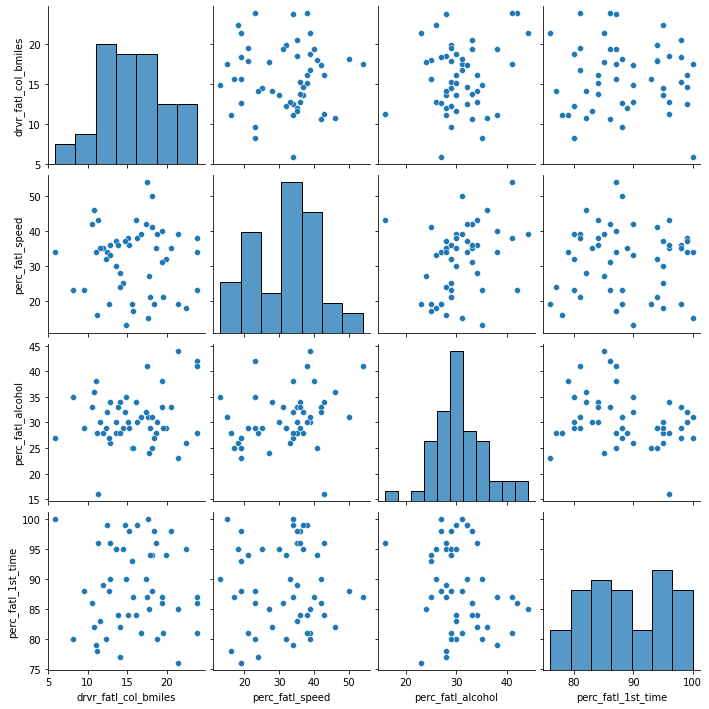

In [9]:
# create a pairwise scatter plot to explore the data
# helpful info for the reader -> A scatter plot shows the association between two variables
# a scatter plot matrix shows all pairwise scatter plots for many variables
sns.pairplot(roadAccidentData)
plt.show()

### 4. Quantify the association of features and accidents

In [10]:
# .corr() function Compute pairwise correlation of columns, excluding NA/null values
correlationResult = roadAccidentData.corr()
correlationResult

,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
drvr_fatl_col_bmiles,1.000000,-0.029080,0.199426,-0.017942
perc_fatl_speed,-0.029080,1.000000,0.286244,0.014066
perc_fatl_alcohol,0.199426,0.286244,1.000000,-0.245455
perc_fatl_1st_time,-0.017942,0.014066,-0.245455,1.000000


### 5. Fit a multivariate linear regression

In [11]:
# import the linear model function from sklearn
from sklearn import linear_model

# create the features and the target
features = roadAccidentData[['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time']]
target = roadAccidentData['drvr_fatl_col_bmiles']

# create a linear regression object
lr = linear_model.LinearRegression()

# fit the model
lr.fit(features, target)

# Retrieve the regression coefficients
fit_coef = lr.coef_
fit_coef

array([-0.04180041,  0.19086404,  0.02473301])

### 6. Perform PCA on standardized data

The cumulative variance of the first two principal components is 0.7947



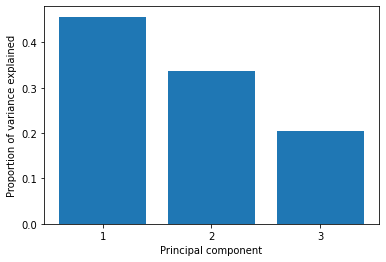

In [12]:
# importation of necessary librairies 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Standardize and center the feature columns
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Import the PCA class function from sklearn
pca = PCA()

# Fit the standardized data to the pca
pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.xticks([1, 2, 3])

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_[0].cumsum()[0] + pca.explained_variance_ratio_[1].cumsum()[0]
print("The cumulative variance of the first two principal components is {}\n".format(
    round(two_first_comp_var_exp, 5)))

### 7. Visualize the first two principal components


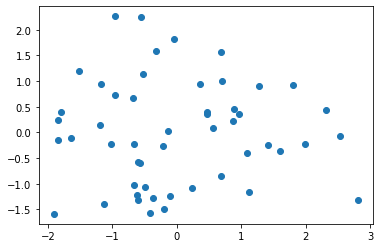

In [13]:
# Transform the scaled features using two principal components
pca = PCA(n_components = 2)
p_comps = pca.fit_transform(features_scaled)

# Extract the first and second component to use for the scatter plot
p_comp1 = p_comps[:, 0]
p_comp2 = p_comps[:, 1]

# Plot the first two principal components in a scatter plot
plt.scatter(p_comp1, p_comp2)

### 8. Find clusters of similar states in the data

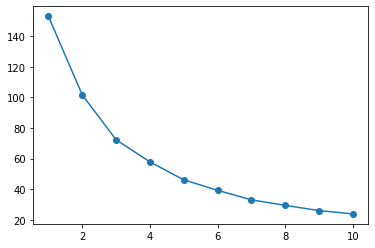

In [14]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 11)
inertias = []
for k in ks:
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)

# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

### 9. KMeans to visualize clusters in the PCA scatter plot

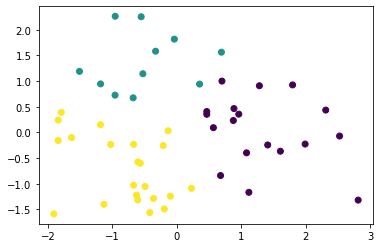

In [15]:
# Create a KMeans object with 3 clusters, use random_state=8 
km = KMeans(n_clusters = 3, random_state = 8)

# Fit the data to the `km` object
km.fit(features_scaled)

# Create a scatter plot of the first two principal components
# and color it according to the KMeans cluster assignment 
plt.scatter(p_comps[:, 0], p_comps[:, 1], c = km.labels_)

### 10. Visualize the feature differences between the clusters

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


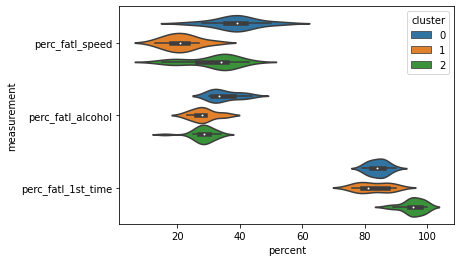

In [16]:
# Create a new column with the labels from the KMeans clustering
roadAccidentData['cluster'] = km.labels_

# Reshape the DataFrame to the long format
melt_car = pd.melt(roadAccidentData, id_vars = ['cluster'], var_name ='measurement', value_name = 'percent', 
                                                   value_vars =['perc_fatl_speed', 'perc_fatl_alcohol', 'perc_fatl_1st_time'])

# Create a violin plot splitting and coloring the results according to the km-clusters
sns.violinplot(melt_car['percent'], melt_car['measurement'], hue = melt_car['cluster'])

### 11. Compute the number of accidents within each cluster

,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time,cluster,million_miles_annually,num_drvr_fatl_col
0,Alabama,18.8,39,30,80,0,64914,1220.3832
1,Alaska,18.1,41,25,94,2,4593,83.1333
2,Arizona,18.6,35,28,96,2,59575,1108.0950
3,Arkansas,22.4,18,26,95,2,32953,738.1472
4,California,12.0,35,28,89,2,320784,3849.4080


,count,mean,sum
cluster,,,
0,18,911.406439,16405.3159
1,11,860.505945,9465.5654
2,22,898.378595,19764.3291


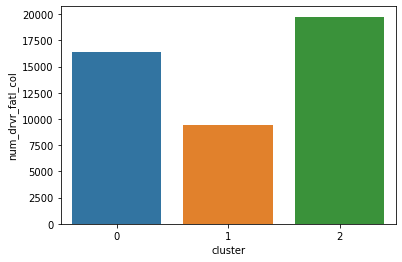

In [17]:
# merge the `roadAccidentData` DataFrame with the `milesDrivenData` DataFrame
roadAccidentmilesDrivenData = roadAccidentData.merge(milesDrivenData, on='state')

# create a new column for the number of drivers involved in fatal accidents
roadAccidentmilesDrivenData['num_drvr_fatl_col'] = (roadAccidentmilesDrivenData['drvr_fatl_col_bmiles'] * roadAccidentmilesDrivenData['million_miles_annually']) / 1000

display(roadAccidentmilesDrivenData.head())

# create a barplot of the total number of accidents per cluster
sns.barplot(x='cluster', y='num_drvr_fatl_col', data=roadAccidentmilesDrivenData, estimator=sum, ci=None)

# calculate the number of states in each cluster and their 'num_drvr_fatl_col' mean and sum
count_mean_sum = roadAccidentmilesDrivenData.groupby('cluster')['num_drvr_fatl_col'].agg(['count', 'mean', 'sum'])
count_mean_sum

### 12. Make a decision when there is no clear right choice

In [18]:
# cluster chosed 
### for the simple reason because he is the large one
cluster_num = 2